#  **Eath Surface Temperature Visualization**


The dataset used in the analysis and visualization is from Berkley Earth. They have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv) contains the following fields:

1.Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
2.LandAverageTemperature: global average land temperature in celsius
3.LandAverageTemperatureUncertainty: the 95% confidence interval around the average
4.LandMaxTemperature: global average maximum land temperature in celsius
5.LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
6.LandMinTemperature: global average minimum land temperature in celsius
7.LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
8.LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
9.LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature

In [1]:
#importing necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')



In [2]:
#loading the dataset
global_temp= pd.read_csv('datasets/GlobalLandTemperaturesByCountry.csv')
global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


**Data Cleaning and Wrangling**

In [3]:
# Removing the duplicated countries
global_temp_cleaned = global_temp[~global_temp['Country'].isin(['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

#replacing the some of the names of the countries
global_temp_cleaned = global_temp_cleaned.replace(['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [4]:
#Averaging the temperature for each country
countries = global_temp_cleaned['Country'].unique()
mean_temp= []
for country in countries:
    mean_temp.append(global_temp_cleaned[global_temp_cleaned['Country'] == country]['AverageTemperature'].mean())
    


**Average Temperature Visualization using Choropleth**

In [5]:
# Creating a choropleth map
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

**Insight:** From above, Russia and Canada are the countries with the lowest average temperature after Greenland. Most of the hottest coutries are in Africa around the equator.

**Visualizing the average temperature by country in a Horizontal Bar**

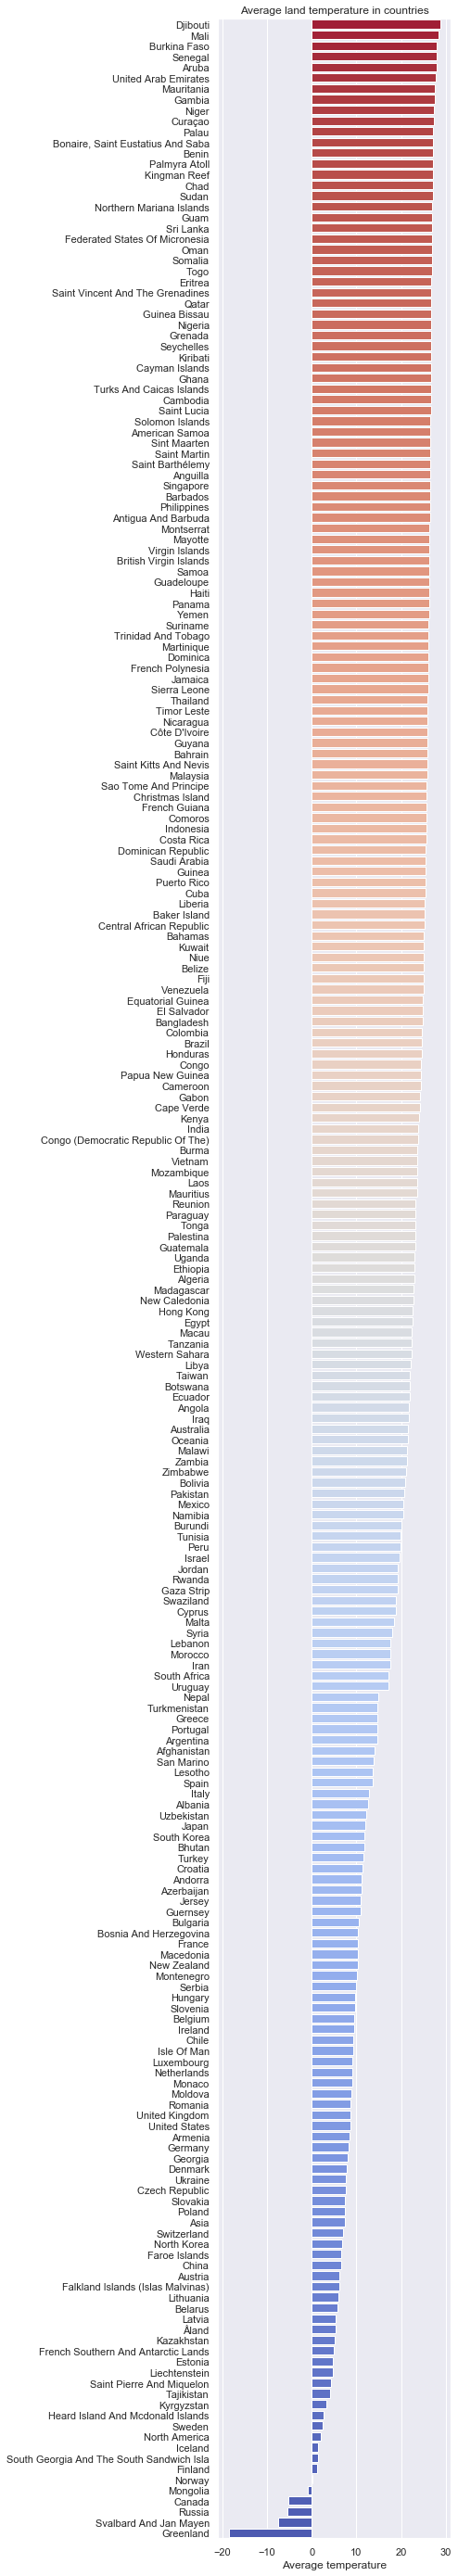

In [6]:
#plotting the horizontal bar
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=1.0) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

**Answering, Is there Global Warming?**

In [7]:
#loading the dataset
global_temp = pd.read_csv("datasets/GlobalTemperatures.csv")
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#wrangling the data- extracting the year from the date column.
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))

mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())


**Visualizing the Data- Land Average Temperature over the years from 1750**

In [9]:
#plotting the chart
trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Insight:** From the above chart, it is clear that the earth surface temperature has been steadily increasing over the past century. The fastest growth has occured over the past 30 years!

**Visualizing Annual Temperature Changes in Specific Countries- Taking Greenland as the coldest place on Earth**

In [10]:
#selecting the countries
continent = ['Russia', 'United States', 'Kenya', 'Greenland', 'Australia', 'Bolivia']

mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]


#getting the mean Average Tempeature in the selected Countries
j = 0
for country in continent:
    all_temp_country = global_temp_cleaned[global_temp_cleaned['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']

#creating the line plots for each country
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on each Country in the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

**Insight:** Since the 1980 there has been a continuous increase in mean annual temperature for the countries, which we take into consideration (particularly strong dynamics can be seen in the cold countries). The interruption of the temperature values on the chart is due to the lack of observations in these years.

**A Static Choropleth Map** 

In [11]:
# visualizing the data using a static Choropleth map
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C'),
        
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')